Importing all the dependencies

In [187]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

Importing the data form ucimlrepo

In [157]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 
  
# metadata 
print(banknote_authentication.metadata) 
  
# variable information 
print(banknote_authentication.variables)

{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

The data

In [158]:
X

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [159]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


In [160]:
data = pd.DataFrame(X)
data.loc[:, "class"] = y
data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


Performing the EDA

In [161]:
data.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [163]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [164]:
data.nunique()

variance    1338
skewness    1256
curtosis    1270
entropy     1156
class          2
dtype: int64

In [165]:
data.columns.tolist()

['variance', 'skewness', 'curtosis', 'entropy', 'class']

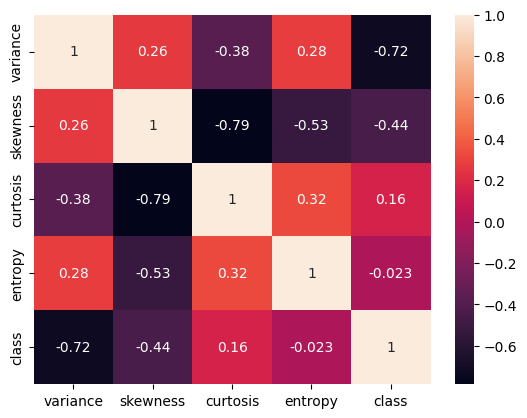

In [166]:
sb.heatmap(data.corr(), annot = True)
plt.show()

Using the train_test split on the original data

In [167]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
x_train, x_test, y_train, y_test

(      variance  skewness  curtosis   entropy
 529   -1.38850   12.5026   0.69118 -7.548700
 243    2.77440    6.8576  -1.06710  0.075416
 1309  -4.28870   -7.8633  11.83870 -1.897800
 664    5.35860    3.7557  -1.73450  1.078900
 745    0.75736    3.0294   2.91640 -0.068117
 ...        ...       ...       ...       ...
 1095   1.16400    3.9130  -4.55440 -3.867200
 1130  -2.29180   -7.2570   7.95970  0.921100
 1294  -7.03640    9.2931   0.16594 -4.539600
 860   -3.46050    2.6901   0.16165 -1.022400
 1126  -3.35820   -7.2404  11.44190 -0.571130
 
 [1097 rows x 4 columns],
       variance   skewness  curtosis  entropy
 430   1.569100   6.346500   -0.1828 -2.40990
 588  -0.278020   8.188100   -3.1338 -2.52760
 296   0.051979   7.052100   -2.0541 -3.15080
 184  -1.755900  11.945900    3.0946 -4.89780
 244   2.428700   9.382100   -3.2477 -1.45430
 ...        ...        ...       ...      ...
 1341 -2.262500  -0.099335    2.8127  0.48662
 1100  1.437800   0.668370   -2.0267  1.02710
 620  

Scaling the data

In [168]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
scaled_data["class"] = y
scaled_x = scaled_data.drop(["class"], axis = 1)
scaled_xtrain, scaled_xtest, _, _ = train_test_split(scaled_x, y, test_size=0.2, random_state=42)
scaled_data, scaled_x, scaled_xtrain

(      variance  skewness  curtosis   entropy  class
 0     1.121806  1.149455 -0.975970  0.354561      0
 1     1.447066  1.064453 -0.895036 -0.128767      0
 2     1.207810 -0.777352  0.122218  0.618073      0
 3     1.063742  1.295478 -1.255397 -1.144029      0
 4    -0.036772 -1.087038  0.736730  0.096587      0
 ...        ...       ...       ...       ...    ...
 1367 -0.009711 -0.097693 -0.660962  0.300996      1
 1368 -0.641313 -1.158984  1.179023  0.730127      1
 1369 -1.472357 -2.621646  3.759017 -0.754884      1
 1370 -1.406693 -1.756471  2.552043 -0.043158      1
 1371 -1.047122 -0.439822  0.298616  1.136464      1
 
 [1372 rows x 5 columns],
       variance  skewness  curtosis   entropy
 0     1.121806  1.149455 -0.975970  0.354561
 1     1.447066  1.064453 -0.895036 -0.128767
 2     1.207810 -0.777352  0.122218  0.618073
 3     1.063742  1.295478 -1.255397 -1.144029
 4    -0.036772 -1.087038  0.736730  0.096587
 ...        ...       ...       ...       ...
 1367 -0.00971

Training the linear SVC model for the scaled and original data

In [169]:
x_train

,variance,skewness,curtosis,entropy
529,-1.38850,12.5026,0.69118,-7.548700
243,2.77440,6.8576,-1.06710,0.075416
1309,-4.28870,-7.8633,11.83870,-1.897800
664,5.35860,3.7557,-1.73450,1.078900
745,0.75736,3.0294,2.91640,-0.068117
...,...,...,...,...
1095,1.16400,3.9130,-4.55440,-3.867200
1130,-2.29180,-7.2570,7.95970,0.921100
1294,-7.03640,9.2931,0.16594,-4.539600
860,-3.46050,2.6901,0.16165,-1.022400


In [170]:
y_train

,class
529,0
243,0
1309,1
664,0
745,0
...,...
1095,1
1130,1
1294,1
860,1


In [171]:
model = svm.SVC(kernel = 'linear')
model_scaled = svm.SVC(kernel = 'linear')
model.fit(x_train, y_train)
model_scaled.fit(scaled_xtrain, y_train)

c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

Reporting the accuracy

In [172]:
train_pred = model.predict(x_train)
train_pred_scaled = model_scaled.predict(scaled_xtrain)
test_pred = model.predict(x_test)
test_pred_scaled = model_scaled.predict(scaled_xtest)
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)
train_acc_scaled = accuracy_score(y_train, train_pred_scaled)
test_acc_scaled = accuracy_score(y_test, test_pred_scaled)

print("Train Accuracy without scaling:-", train_acc, "and with scaling is:-", train_acc_scaled)
print("Test Accuracy without scaling:-", test_acc, "and with scaling:-", test_acc_scaled)

Train Accuracy without scaling:- 0.9890610756608933 and with scaling is:- 0.9881494986326345
Test Accuracy without scaling:- 0.9854545454545455 and with scaling:- 0.9854545454545455


Making the decision boundaries

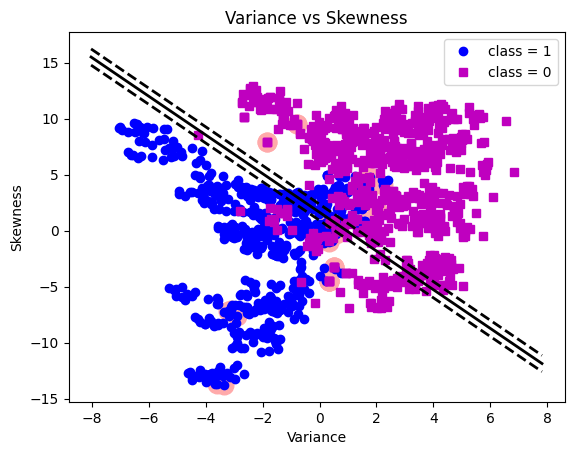

In [179]:
plt.plot(data[data["class"] == 1]["variance"], data[data["class"] == 1]["skewness"], "bo", label = "class = 1")
plt.plot(data[data["class"] == 0]["variance"], data[data["class"] == 0]["skewness"], "ms", label = "class = 0")
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.legend()
plt.title("Variance vs Skewness")

x_min = min(data["variance"])-1
x_max = max(data["variance"])+1
w = model.coef_[0]
b = model.intercept_[0]
x0 = np.linspace(x_min, x_max, 200)
decision_boundary = -w[0]/w[1]*x0 - b/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

svs = model.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
plt.plot(x0, decision_boundary, "k-", linewidth=2)
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.show()

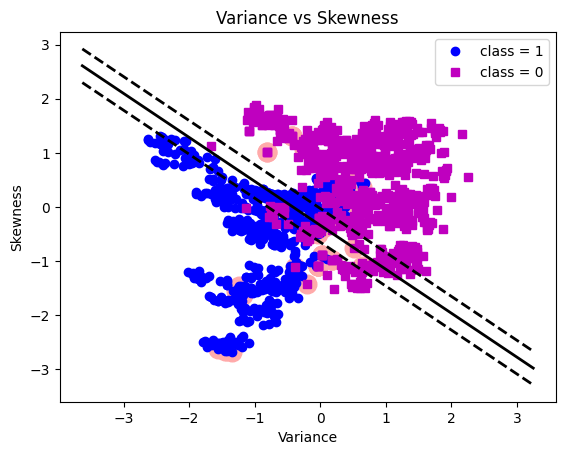

In [181]:
plt.plot(scaled_data[scaled_data["class"] == 1]["variance"], scaled_data[scaled_data["class"] == 1]["skewness"], "bo", label = "class = 1")
plt.plot(scaled_data[scaled_data["class"] == 0]["variance"], scaled_data[scaled_data["class"] == 0]["skewness"], "ms", label = "class = 0")
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.legend()
plt.title("Variance vs Skewness")

x_min = min(scaled_data["variance"])-1
x_max = max(scaled_data["variance"])+1
w = model_scaled.coef_[0]
b = model_scaled.intercept_[0]
x0 = np.linspace(x_min, x_max, 200)
decision_boundary = -w[0]/w[1]*x0 - b/w[1]
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

svs = model_scaled.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
plt.plot(x0, decision_boundary, "k-", linewidth=2)
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)


plt.show()

c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0 1.0


ValueError: n_features must be equal to 2. Got 4 instead.

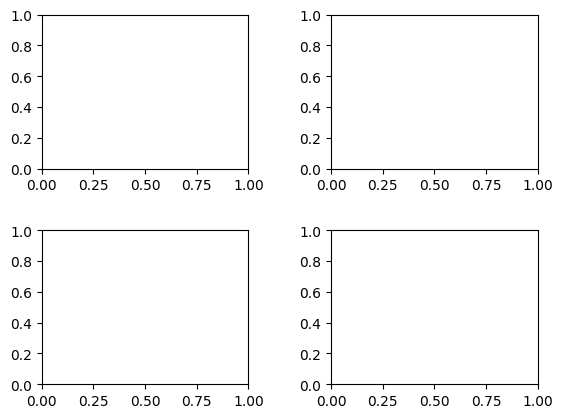

In [190]:
model_scaled = svm.SVC(kernel = "rbf")
model_scaled.fit(scaled_xtrain, y_train)
pred = model_scaled.predict(scaled_xtrain)
acc = accuracy_score(y_train, pred)
pred2 = model_scaled.predict(scaled_xtest)
acc2 = accuracy_score(y_test, pred2)
print(acc, acc2)

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax = sub.flatten()[0]
disp = DecisionBoundaryDisplay.from_estimator(model_scaled, scaled_xtrain, response_method="predict", cmap=plt.cm.coolwarm, alpha=0.8, ax=ax,
    xlabel="Variance",
    ylabel="Skewness",
)
ax.scatter(scaled_xtrain["variance"], scaled_xtrain["skewness"], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("RBF decision boundary")

plt.show()

c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not       class
529       0
243       0
1309      1
664       0
745       0
...     ...
1095      1
1130      1
1294      1
860       1
1126      1

[1097 rows x 1 columns]

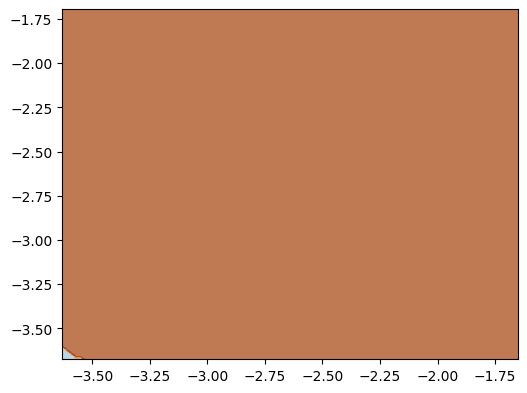

In [199]:
plt.figure(figsize=(20, 10))
gamma_values = [0.1, 1, 10, 50, 100, 200]
for i, gamma in enumerate(gamma_values, 1):
    # Train SVM with RBF kernel
    clf_rbf = svm.SVC(kernel='rbf', gamma=gamma)
    clf_rbf.fit(scaled_xtrain.iloc[:, 0:2], y_train)

    # Create a mesh to plot decision boundaries
    h = 0.02  # step size in the mesh
    x_min, x_max = min(scaled_xtrain["variance"])- 1, min(scaled_xtrain["variance"]) + 1
    y_min, y_max = min(scaled_xtrain["skewness"]) - 1, min(scaled_xtrain["skewness"]) + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot decision boundary
    plt.subplot(2, 3, i)
    Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_rbf = Z_rbf.reshape(xx.shape)
    plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(scaled_xtrain["variance"], scaled_xtrain["skewness"], c=y_train, cmap=plt.cm.Paired)
    plt.title(f'RBF SVM (Gamma={gamma})')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()